# Exploratory Data Analysis

Problem: Create forecasting product for Airbnb in the state of New York.

## Libraries and data

In [53]:
# Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt

In [27]:
# Data
df = pd.read_csv('Data/nyc-data.csv',
                 index_col=0,  # Makes date column the index
                 parse_dates=True)  # Transform dates into YYYY-MM-DD
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [28]:
# Rename dependent variable
df = df.rename(columns={'Demand': 'y'})
df.head(1)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2015-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y             2192 non-null   float64
 1   Easter        2192 non-null   int64  
 2   Thanksgiving  2192 non-null   int64  
 3   Christmas     2192 non-null   int64  
 4   Temperature   2192 non-null   float64
 5   Marketing     2192 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 119.9 KB


## Data Analysis

In [7]:
# Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


Looking at the min and max of y shows some variability in the data, implying some kind of seasonality.

Marketing variablility is quite high based on mean and std.

## Seasonal Decomposition

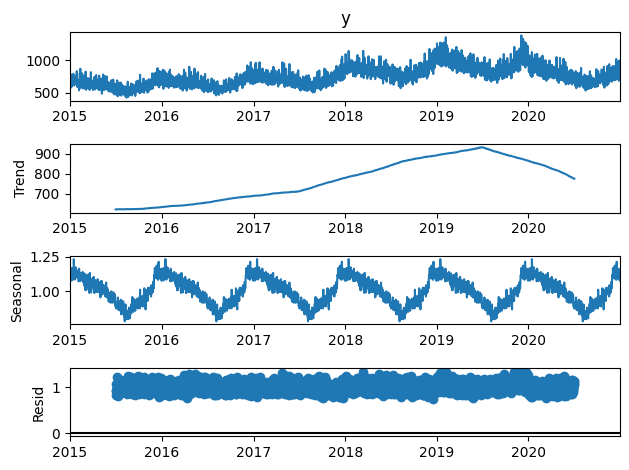

In [15]:
# Decomposition
decomposition_multiplicative = seasonal_decompose(x=df.y,
                                                  model='multiplicative',
                                                  period=365)
decomposition_multiplicative.plot();

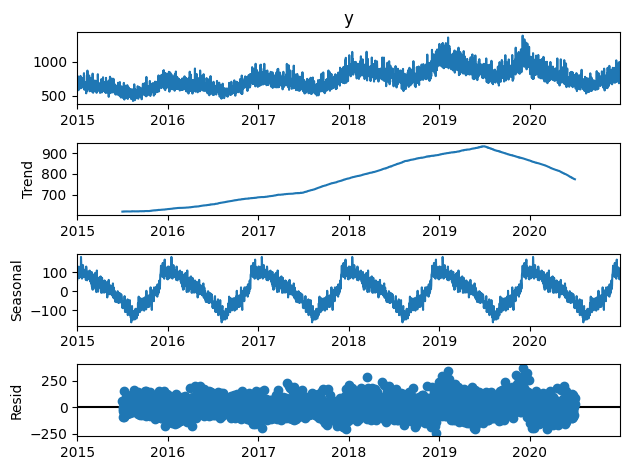

In [16]:
decomposition_additive = seasonal_decompose(x=df.y,
                                            model='additive',
                                            period=365)
decomposition_additive.plot();

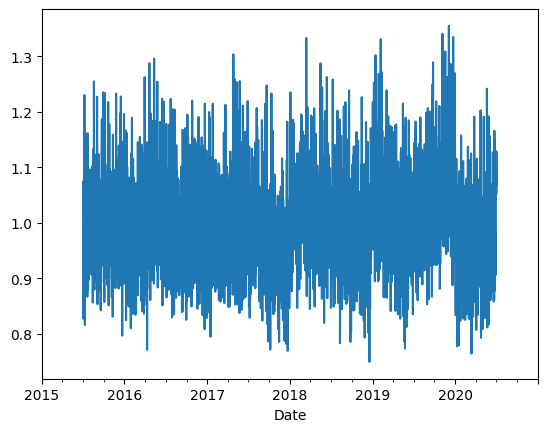

In [18]:
# Plotting a specific graph
decomposition_multiplicative.resid.plot();

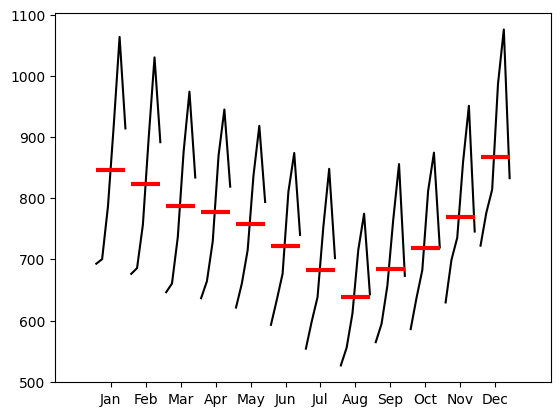

In [30]:
# Seasonal graphs
month_plot(df.y.resample(rule='MS').mean());  # Need to resample daily data to monthly

Black lines show the trends of the months over the different years in the data.  The red bars represent the average seasonality across the years for each month.

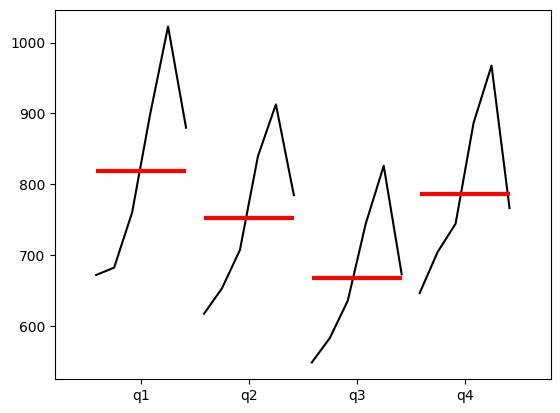

In [32]:
# Quarterly
quarter_plot(df.y.resample(rule='Q').mean());

## Advanced Visualization

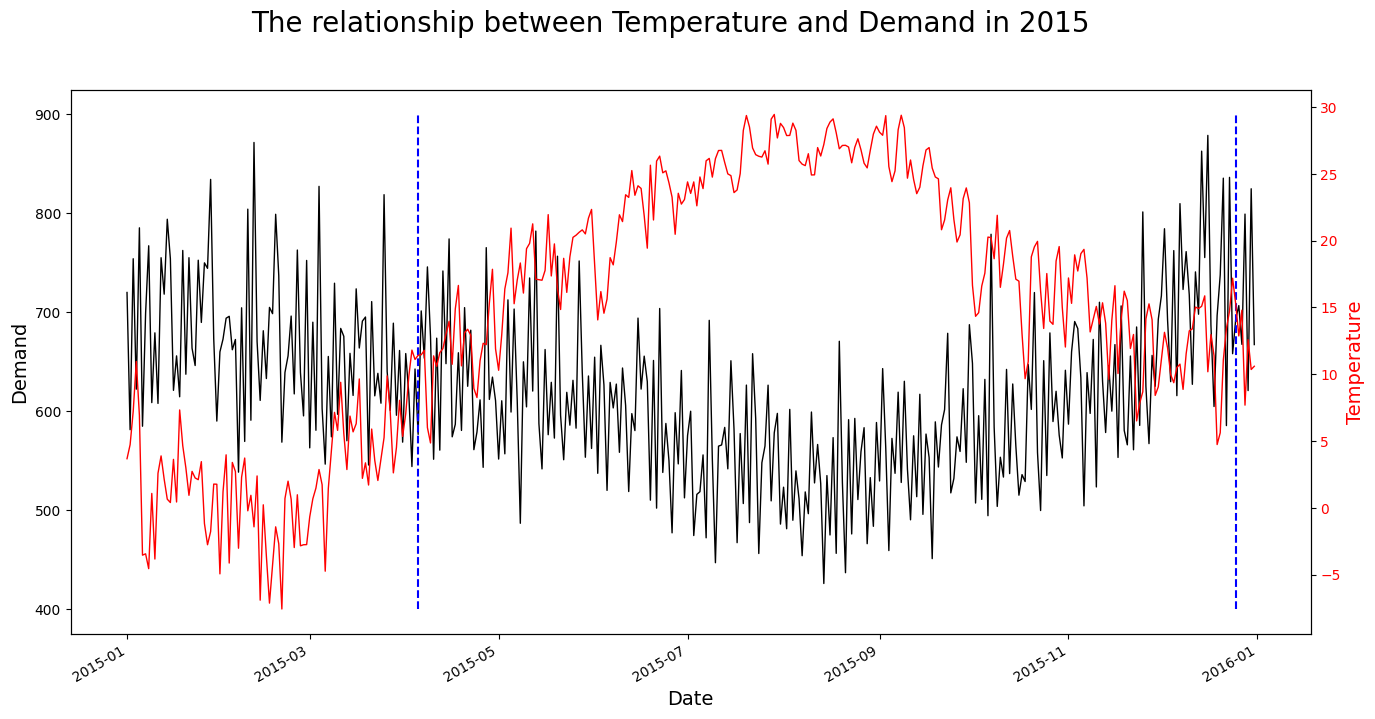

In [50]:
# Create a version B of the dataframe
df_plot = df.loc['2015-01-01':'2015-12-31']

# Define colors
temp_color = 'red'
y_color='black'

# Create empty plot
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

# Data and lines
ax1.plot(df_plot.index, df_plot.y, color=y_color, lw=1)
ax2.plot(df_plot.index, df_plot.Temperature, color=temp_color, lw=1)

# Title and Dates
fig.suptitle("The relationship between Temperature and Demand in 2015", fontsize=20)
fig.autofmt_xdate()

# First axis
ax1.set_xlabel("Date", fontsize=14)
ax1.tick_params(axis='y', labelcolor=y_color)
ax1.set_ylabel('Demand', color=y_color, fontsize=14)

# Second axis
ax2.tick_params(axis='y', labelcolor=temp_color)
ax2.set_ylabel('Temperature', color=temp_color, fontsize=14)

# Add holidays or events
events = df_plot[(df_plot.Easter == 1) |
                 (df_plot.Christmas == 1)].index
ax1.vlines(x=events, ymin=400, ymax=900, color='b', ls='--');

In [52]:
# Correlation
df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


### Auto-correlation plots (ACF)

* There is information in the past.
* You correlate the time series with its lagged values.
* the correlation will decrease with higher lags (farther in the past).

This plot tells us if there information in the past.

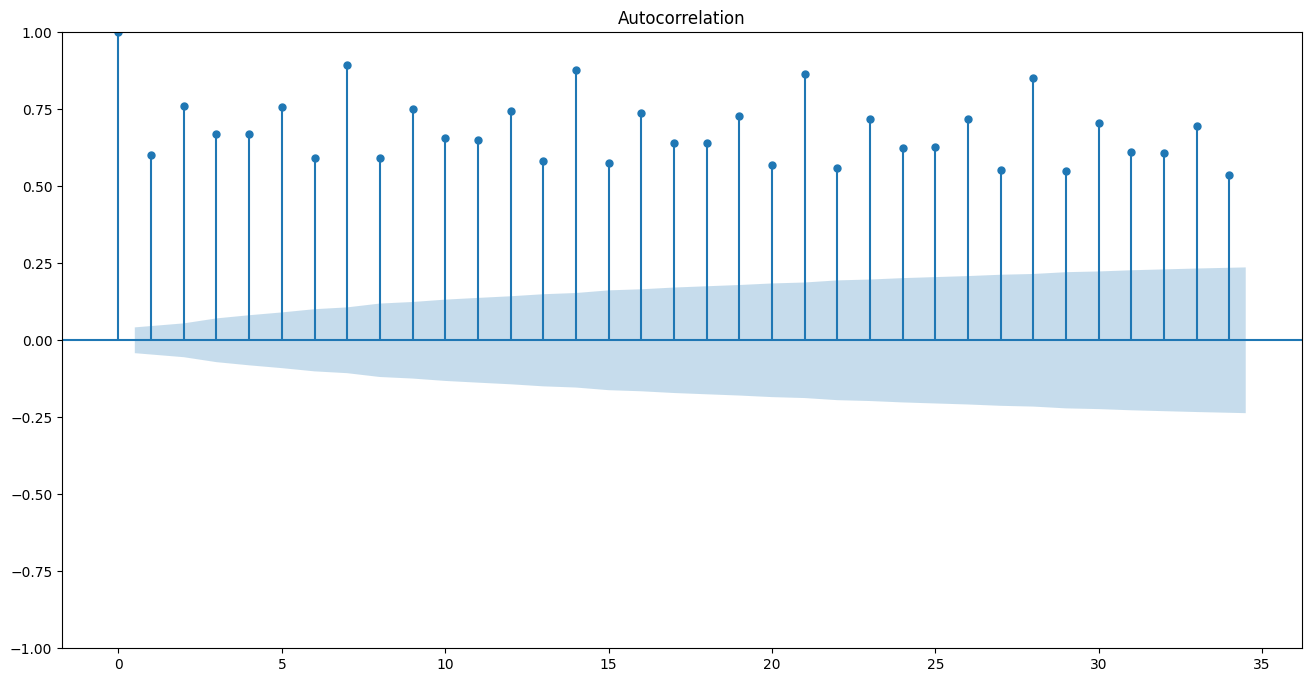

In [55]:
# ACF plot
plt.rcParams['figure.figsize'] = (16, 8)
plot_acf(df.y)
plt.show();

This graph has periodic peaks in multiples of 7.  This shows that there is in fact information in the past for this data.